This notebook uses images from relabeling dataset. Preprocessing and augmentation include:

1.   Resize: Stretch to 2408 x 2408
2.   Tile: 10 rows x 10 columns
3.   Modify Classes: 0 remapped, 45 dropped(Only contains NRMM related classes )
4.   Filter Null: Require at least 85% of images to contain annotations.

5.   Outputs per training example: 4
6.   Flip: Horizontal, Vertical


Train/Test Split:


*   Training set: 4k 92%
*   Validation set: 198 7%
*   Training set: 158 6%

And also try with different model parameters.


##1.Initialization

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##2. Data Downloading
*   in data.yaml (content/-NRMM-3/data.yaml)file, the path of data need to be exact paths:
  *   test: /content/-NRMM-10/test/images
  *   train: /content/-NRMM-10/train/images
  *   val: /content/-NRMM-10/valid/images

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AXtvn8E5cqIPHd94QNpU")
project = rf.workspace("university-college-london-pmvix").project("nrmm")
dataset = project.version(10).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=2ddadea2ee65aa73473bd543377f0c089dfc67bce3c3b08da8cfeddfeb91547c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to -NRMM-10 in yolov8:: 100%|██████████| 8659/8659 [00:02<00:00, 4300.01it/s]


##3. Model Training

yolov8s,epoch 50 try dfl=2

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 dfl=2 plots=True

100% 21.5M/21.5M [00:01<00:00, 15.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/-NRMM-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

/content


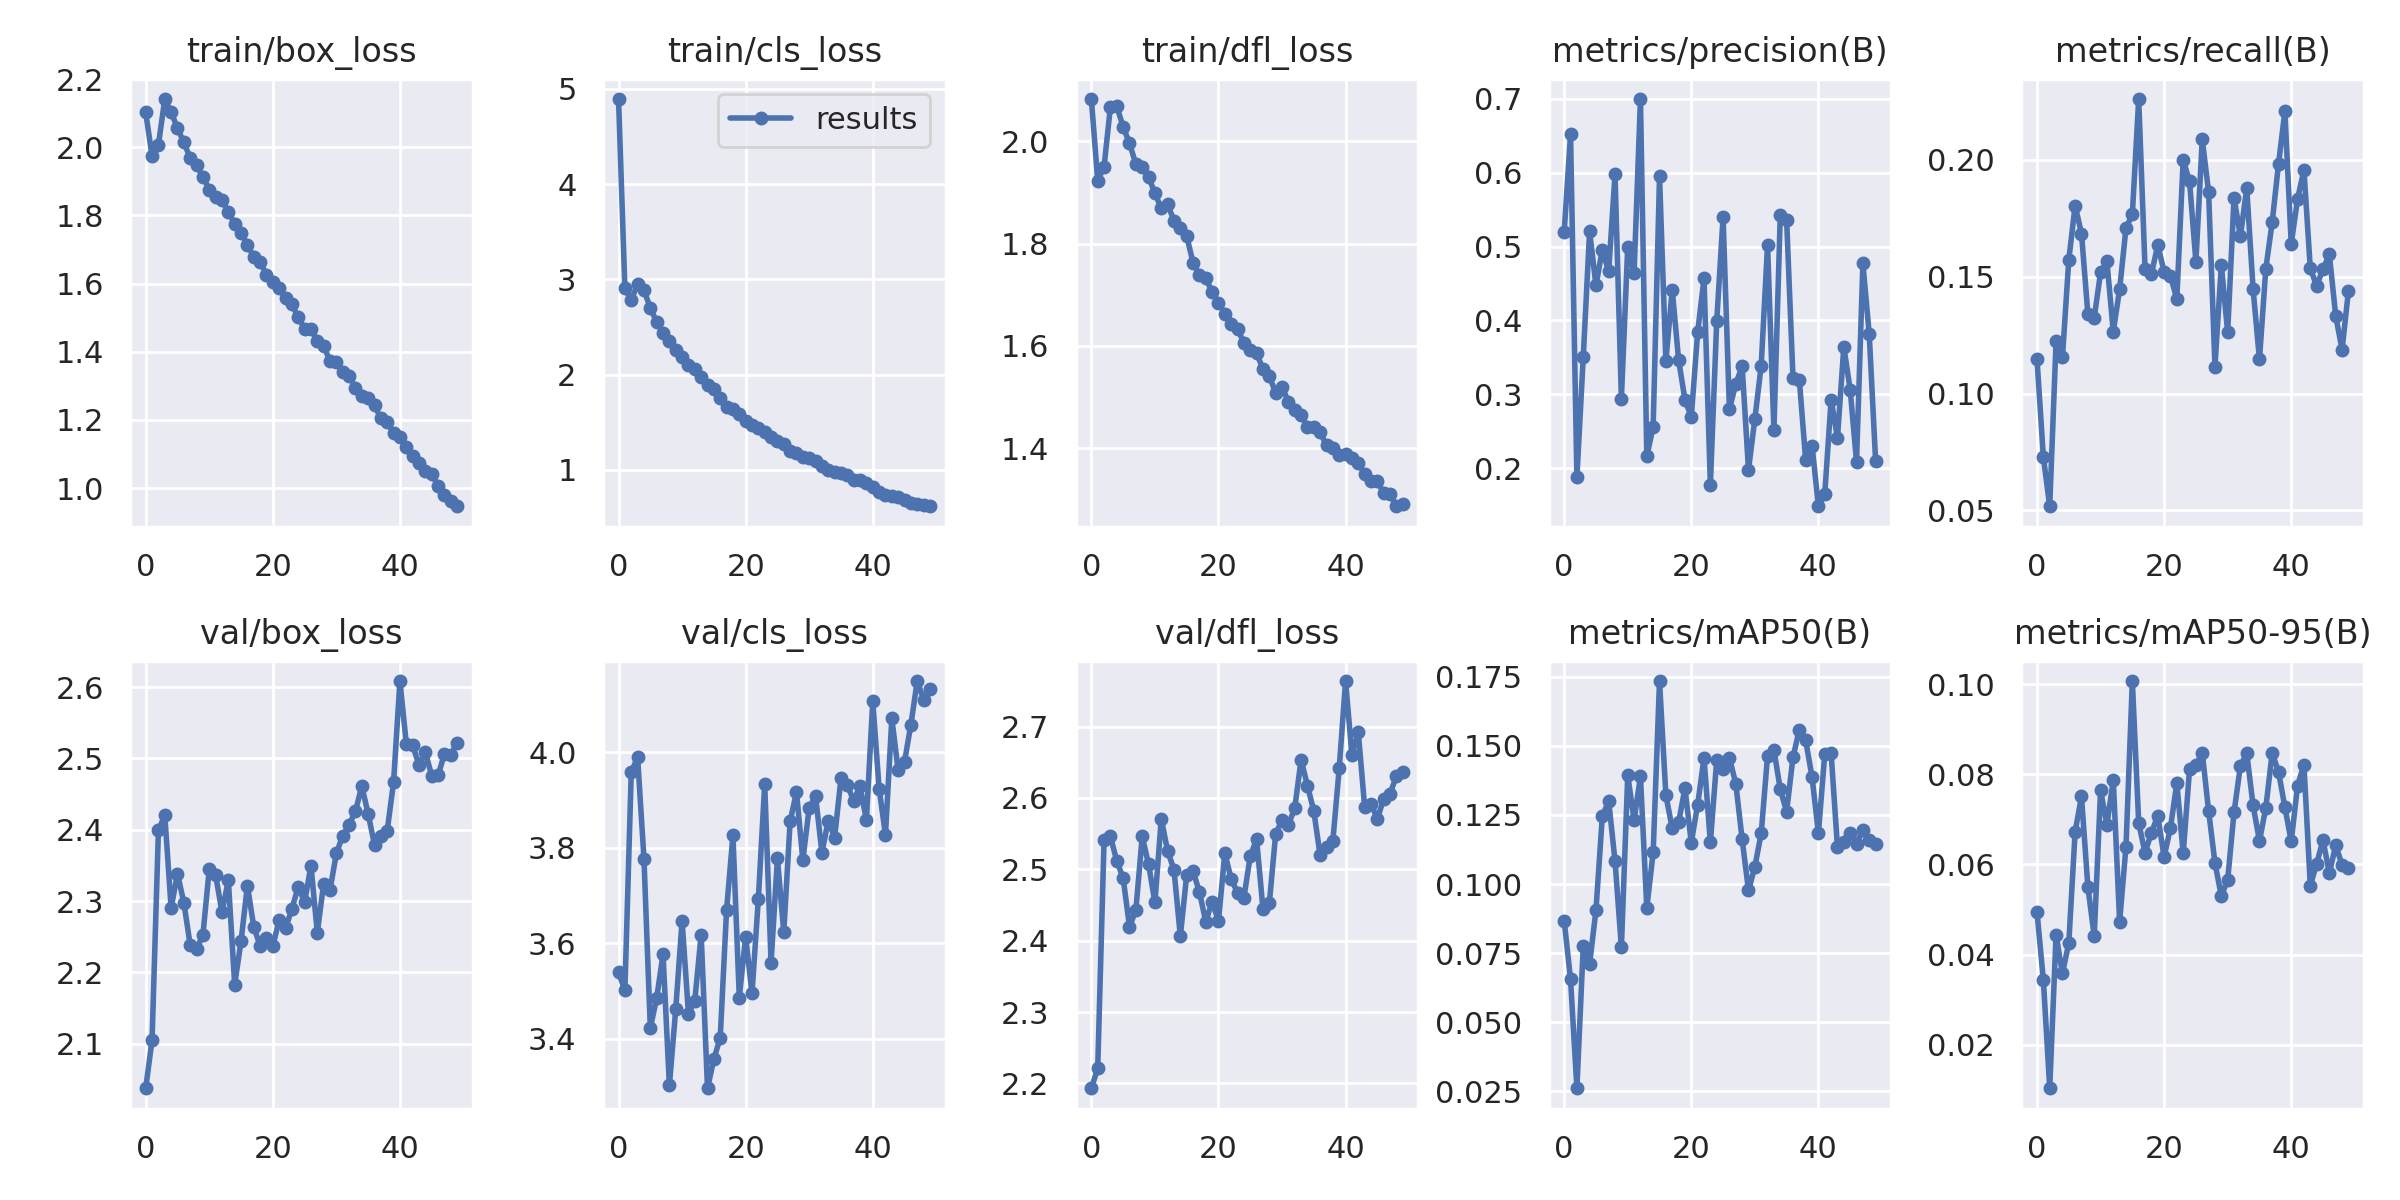

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


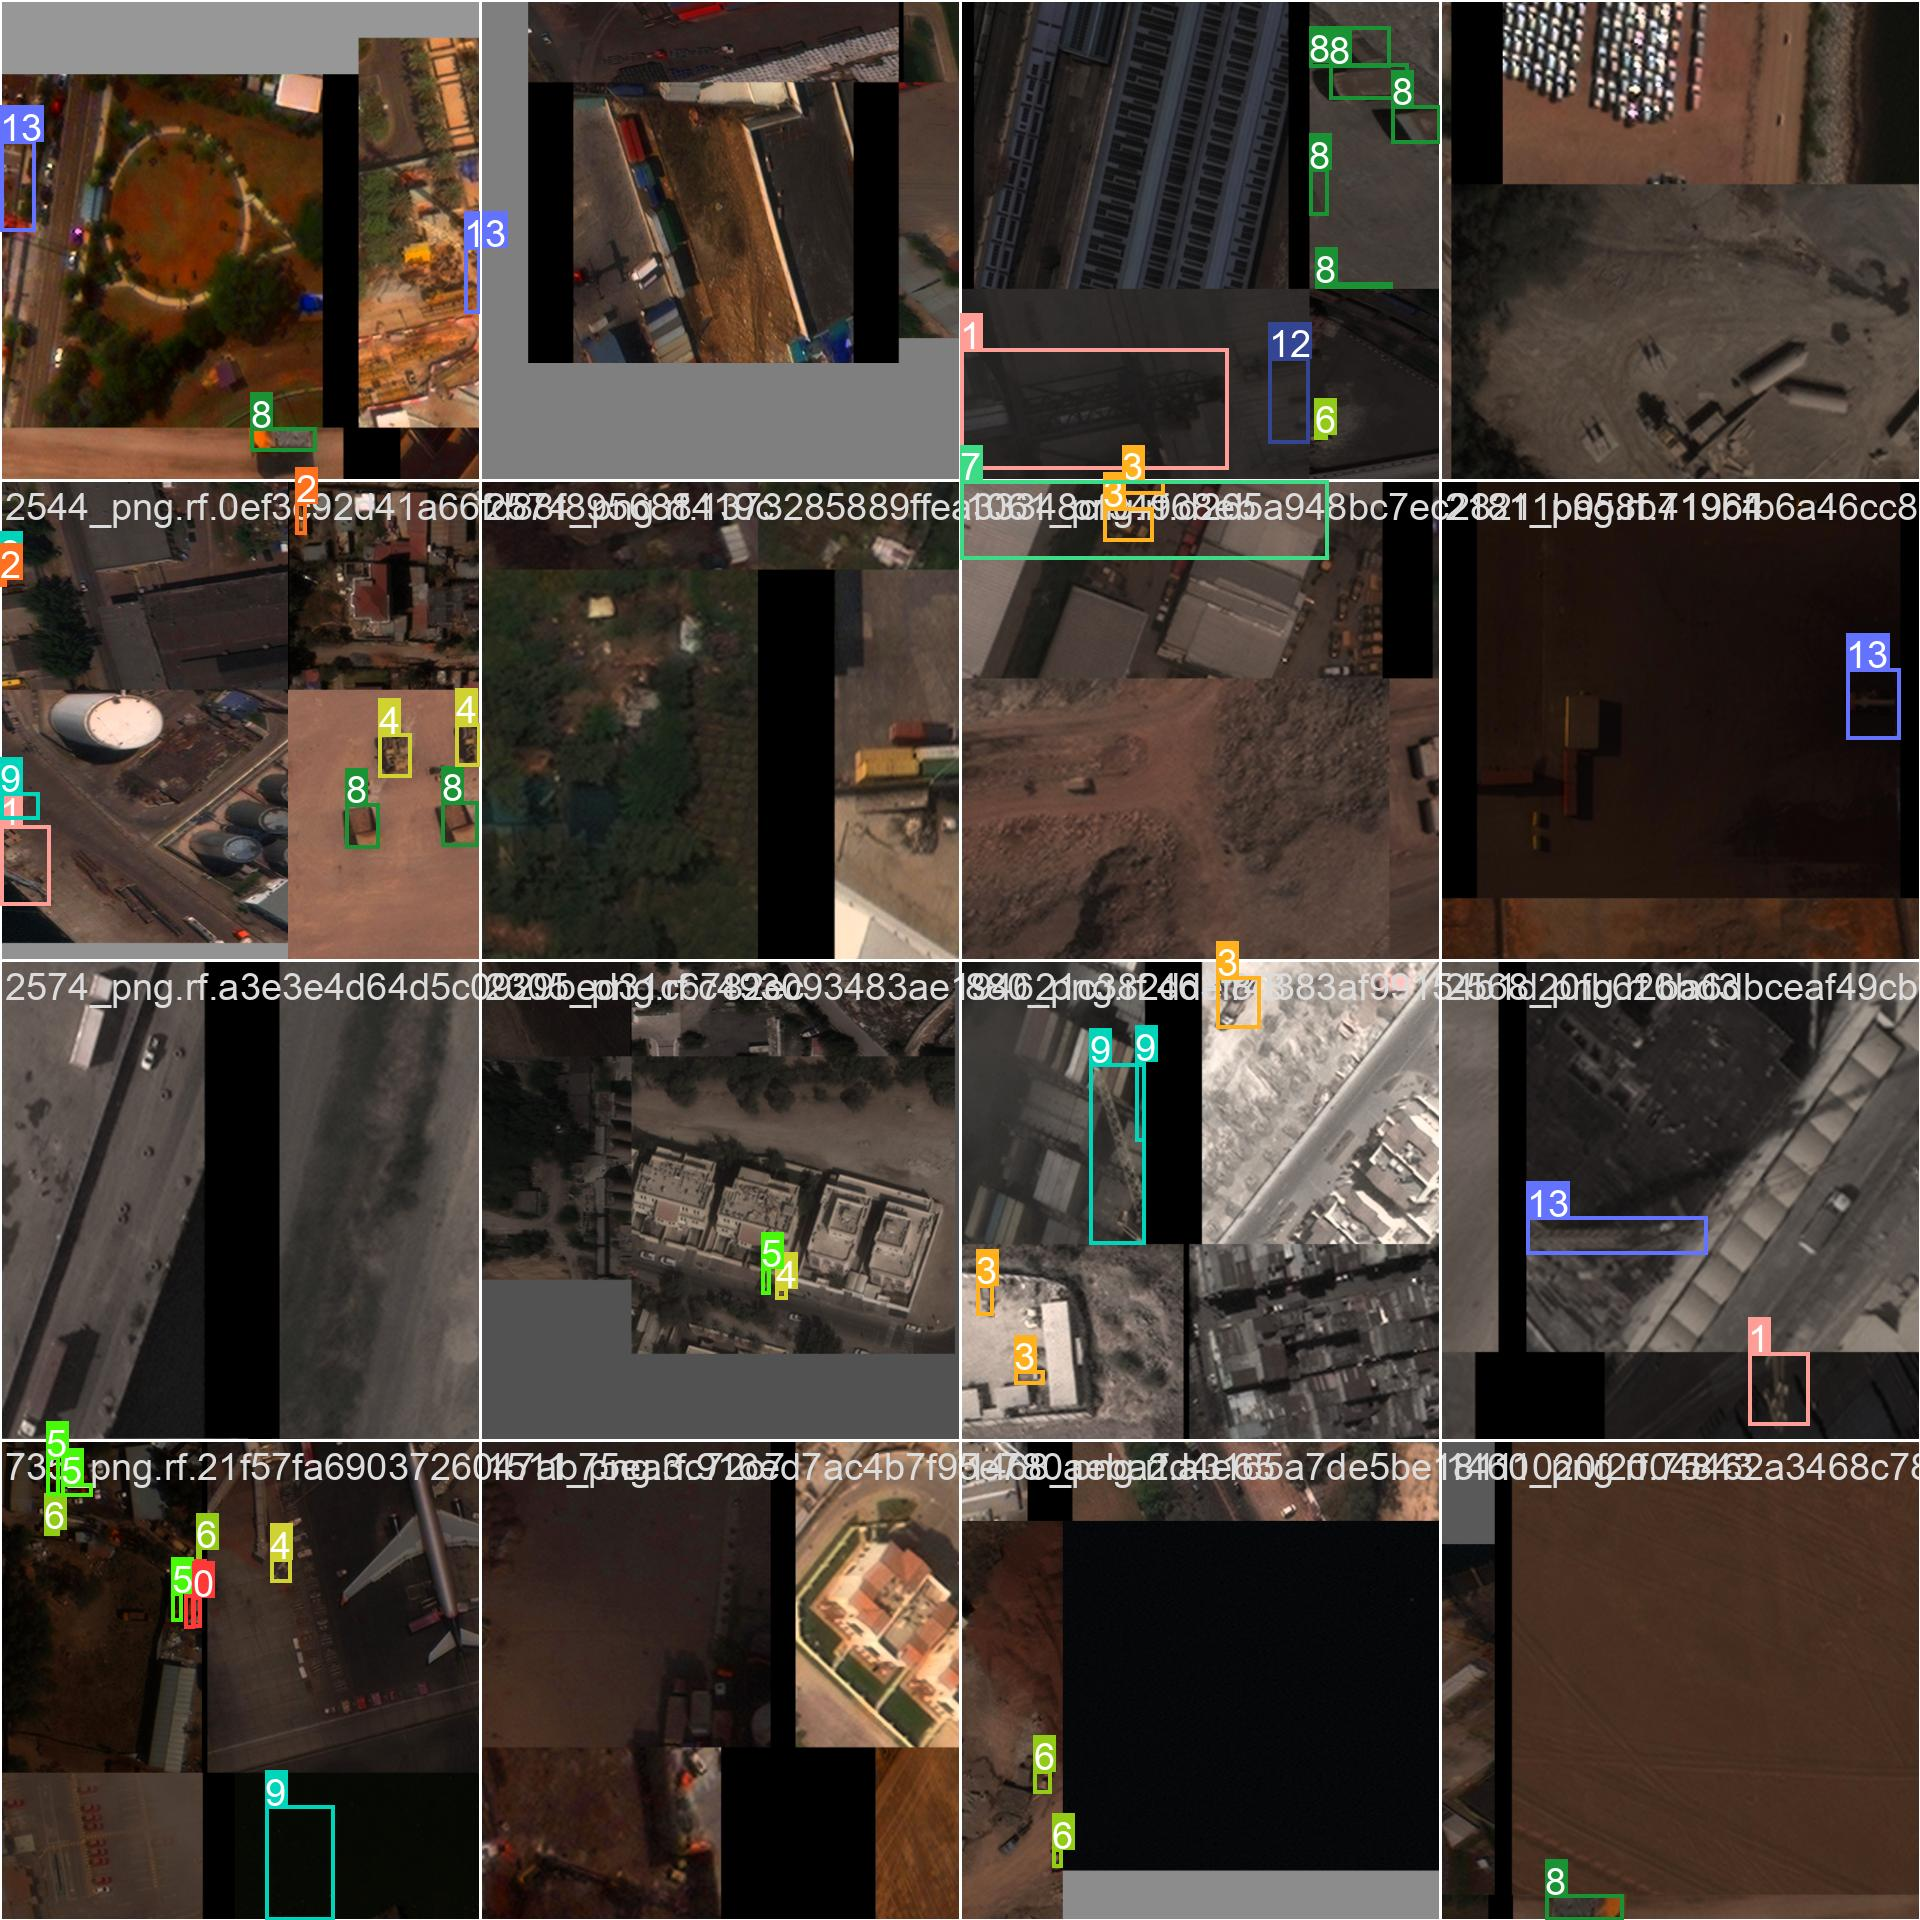

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/content


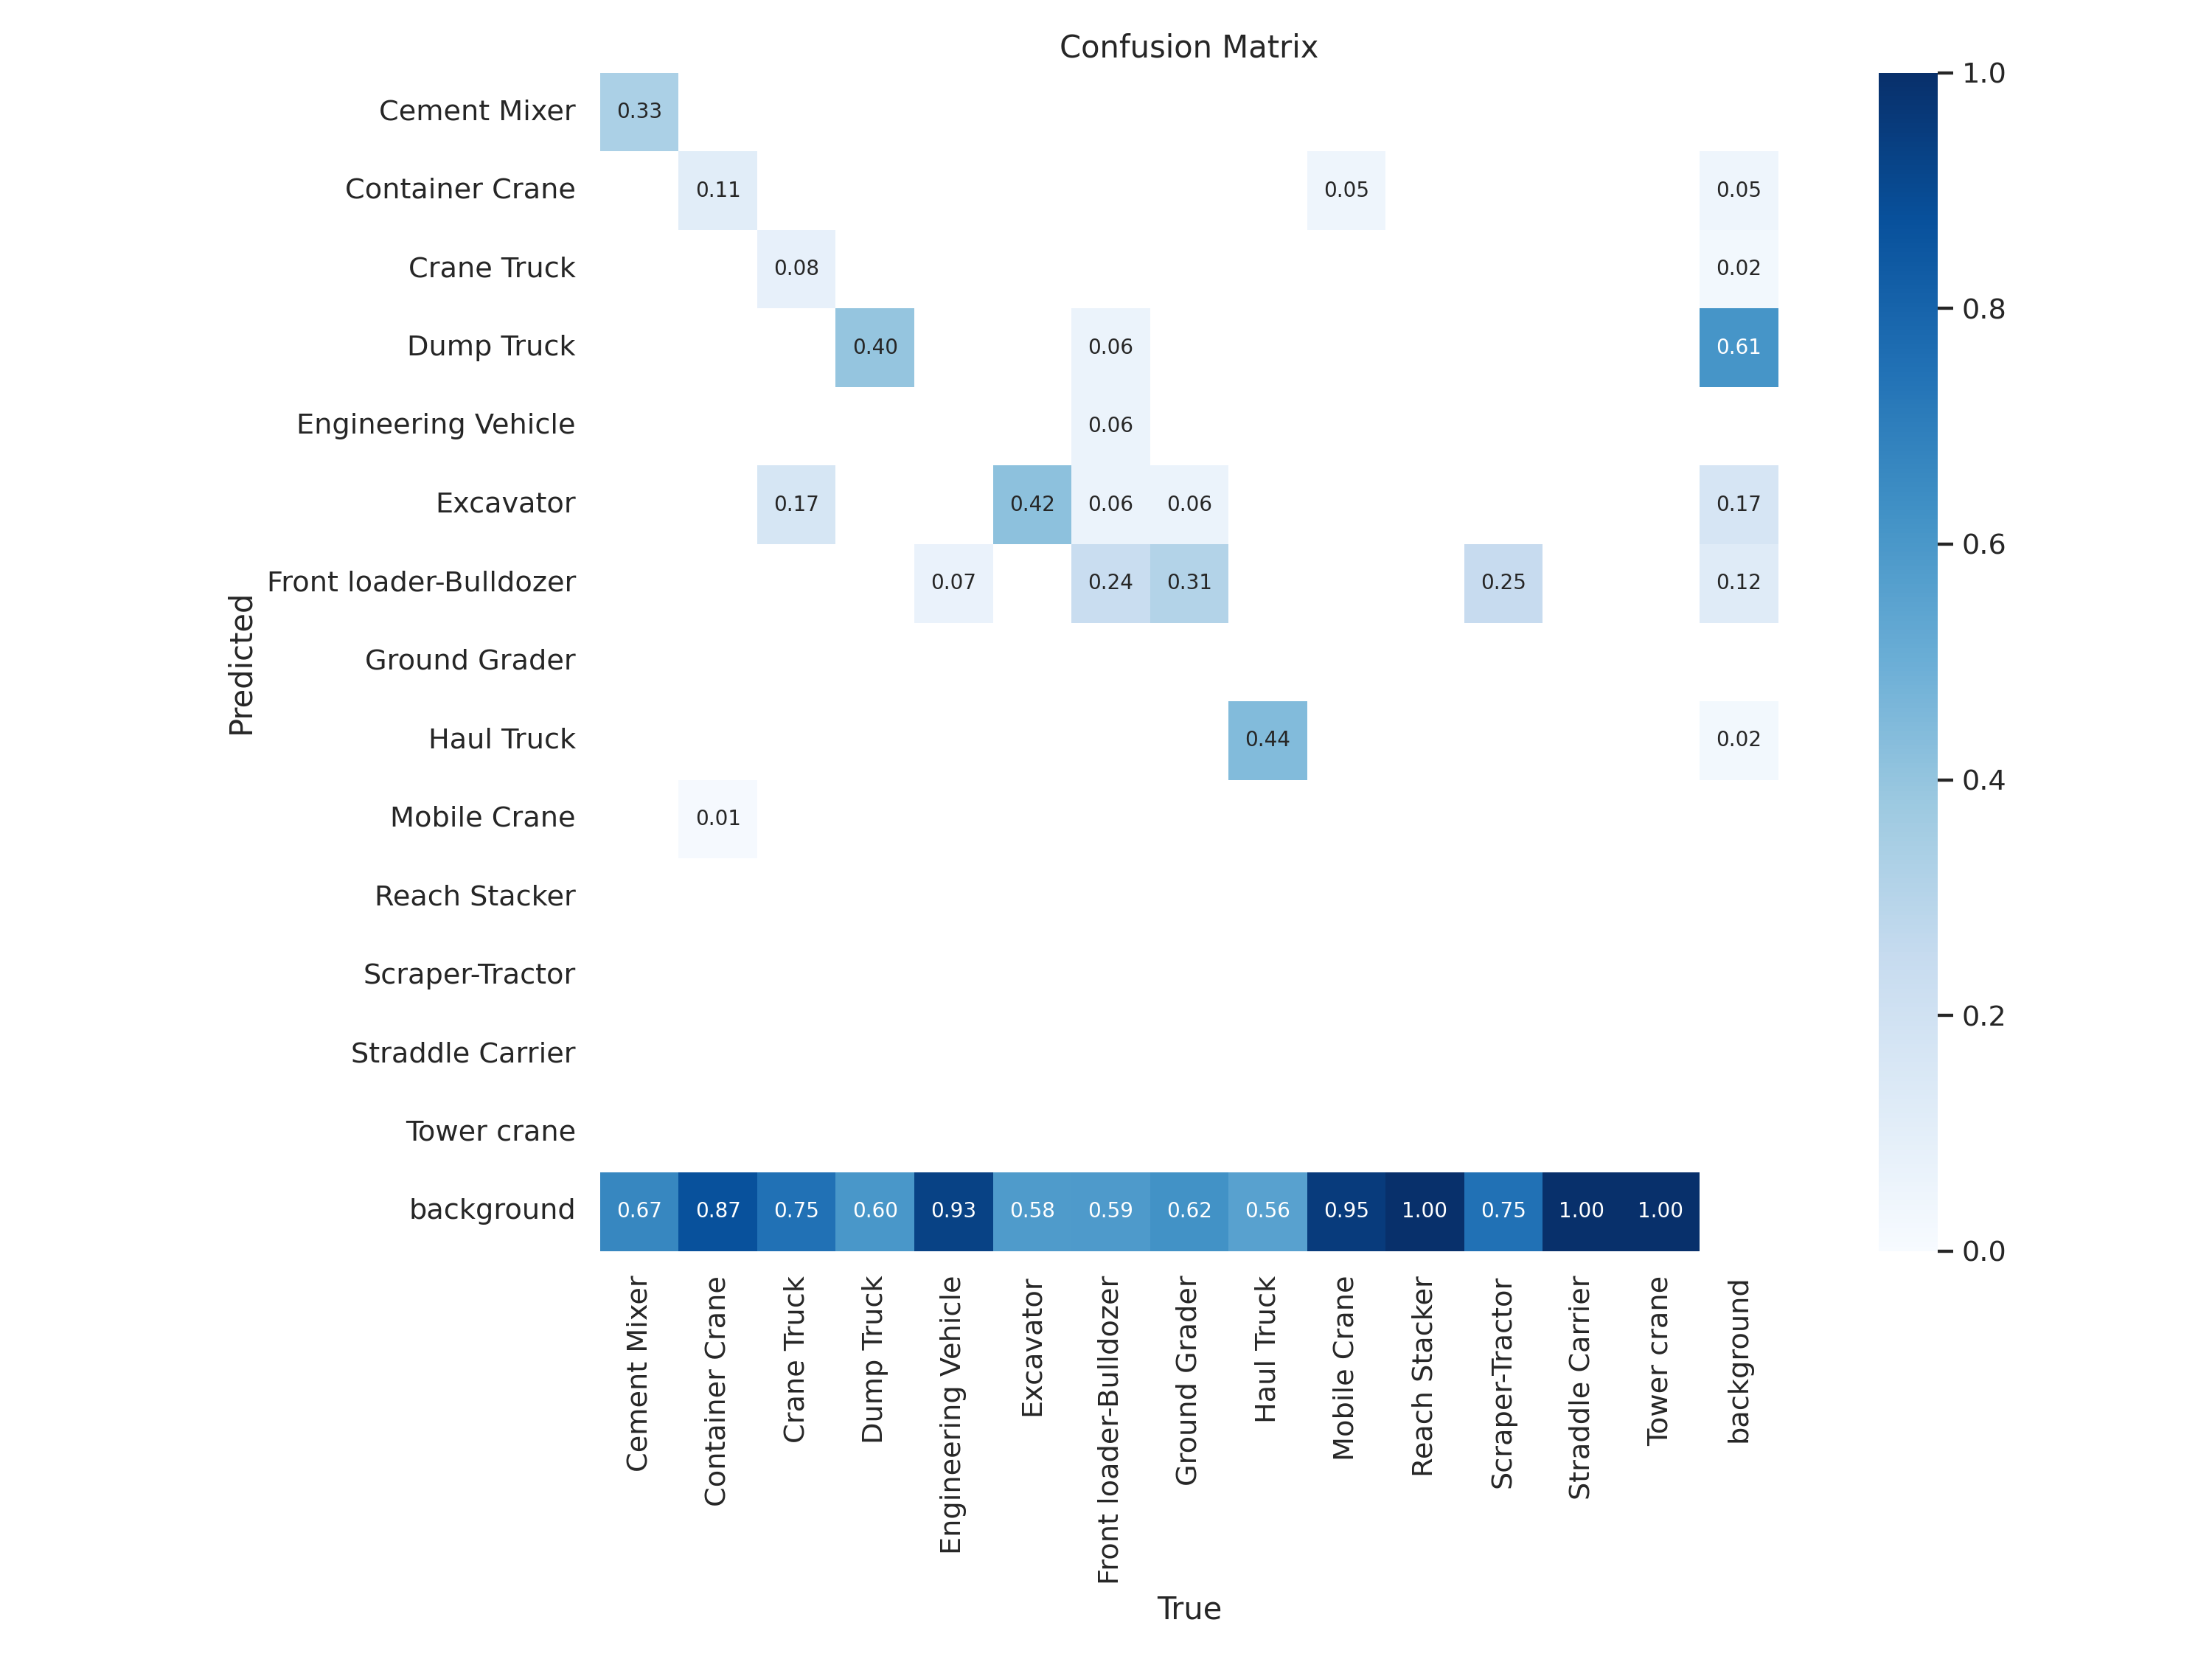

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-27 07:14:16.358797: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-27 07:14:16.413170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 07:14:17.340550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/-NRMM-10/valid/labels.cache... 198 im

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-27 07:15:25.559213: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-27 07:15:25.614299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 07:15:26.535307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc9

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 dfl=2.5 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/-NRMM-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [17]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 close_mosaic=50 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/-NRMM-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=50, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

Save files to google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_v5'
if not os.path.exists(save_path):
    os.makedirs(save_path)


Save predict output

In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)


save validation output

In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

save training output

In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [ ]:
#also the model
shutil.copy("/content/runs/detect/train/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_v5/last.pt'